# Plotting Tools

In [56]:
import os
import csv
import glob
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
import os

In [57]:
os.chdir("/home/yu")
code = ['layer_4x200_swish', 'layer_4x200_sine', 'layer_2x200_swish']
envs = ['halfcheetah', 'gym_ant', 'gym_hopper']
activations = ['swish', 'sine']
files = {}
models = {}
for item in code:
    path = '/home/yu/git_ws/ece598/POPLIN/log/PETS/{idx}/*/*/logs.mat'.format(idx = item)
    files[item] = glob.glob(path)
    path_model =  '/home/yu/git_ws/ece598/POPLIN/log/PETS/{idx}/*/*/model.mat'.format(idx = item)
    models[item] = glob.glob(path_model)
#     print(files[item])

In [58]:
def plot_result(files, env_name, Idxs): 
    plt.figure()
    for i in Idxs:
        env_file_list = [name for name in files[code[i]] if env_name in name]
#     print(env_file_list)
        returns = []
        for name in env_file_list:
            returns.append(loadmat(name)['returns'])

        returns = np.concatenate(returns)
        std_rewards = np.std(returns, 0)
        returns = np.maximum.accumulate(returns, axis=-1)
        mean_rewards = np.mean(returns, axis=0)
        plt.plot(np.arange(50), mean_rewards, label = code[i])
        plt.fill_between(np.arange(50),mean_rewards-std_rewards, mean_rewards+std_rewards, alpha=0.2)
        
    plt.legend( loc='upper left')
    plt.title(env_name)
    plt.xlabel("iteration number")
    plt.ylabel("reward")
    plt.show()

halfcheetah


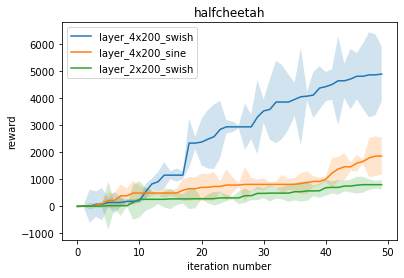

gym_ant


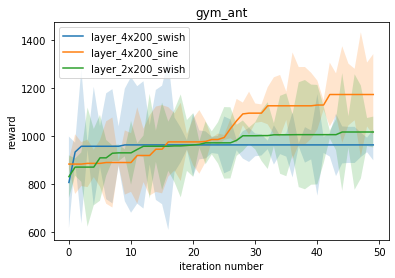

gym_hopper


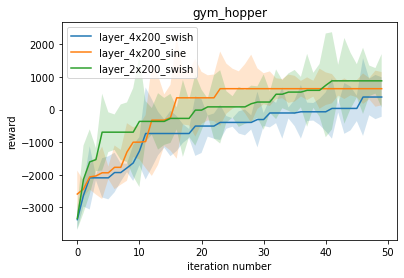

In [59]:
# change indexs(following code name) in idxs to what you want to compare
for env in envs:
    print(env)
    idxs = [0,1,2]
    plot_result(files, env, idxs )

In [60]:
# get observation range from the environment
def get_observation_range(files, env_name, Idxs): 
    for i in Idxs:
        env_file_list = [name for name in files[code[i]] if env_name in name]
#     print(env_file_list)
        observations = []
        for name in env_file_list:
            observations.append(loadmat(name)['observations'])

        observations = np.concatenate(observations)
        print(observations.shape)
        max_obs = np.max(np.max(observations, 1),0)
        min_obs = np.min(np.min(observations, 1),0)
        
        print("max_obs of {env}".format(env = env_name), max_obs)
        print("min_obs of {env}".format(env = env_name), min_obs)

In [61]:
for env in envs:
    print(env)
    get_observation_range(files, env, [0])

halfcheetah
(153, 1001, 18)
max_obs of halfcheetah [ 9.96128474  0.98984282 56.42344112  1.10883563  0.89405376  0.91599938
  0.88814824  1.07776409  0.73160817 10.48143774  4.97410966 13.39867047
 25.49660014 31.22417231 24.50860937 31.08020618 33.91224822 29.45049987]
min_obs of halfcheetah [ -4.12962609  -0.60089228  -3.38180708  -0.70808846  -0.94726328
  -0.69846955  -1.1664694   -1.25208849  -0.71914243  -4.62570942
  -6.07998072 -10.07353218 -27.25994739 -29.93182322 -29.46358498
 -26.98998881 -32.6241283  -23.90487897]
gym_ant
(153, 1001, 27)
max_obs of gym_ant [ 2.95740289  0.99999149  0.99982883  0.9998585   0.99980208  0.68677208
  1.35133411  0.6962879   0.09895299  0.68500648  0.09878973  0.69019431
  1.36160244  4.74811162  4.5842259   6.27479401 14.2021727  12.43167361
 10.69651593 17.07403083 18.01675964 17.01246318 14.53401165 17.38114028
 14.47999146 17.0391048  17.98908219]
min_obs of gym_ant [  0.22637723  -0.99981976  -0.99996822  -0.99974723  -0.99999862
  -0.6887